In [1]:
%matplotlib inline

import nltk.data;

from gensim.models import word2vec;
from gensim.models import Word2Vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;

import os;
import time;
import logging;
import sys;
import multiprocessing;
import matplotlib.pyplot as plt;
from itertools import cycle;

import pandas as pd  
import time as time

from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation

from gensim.models import Phrases

In [225]:
start = time.time()
intro = pd.read_csv('~/Documents/CWTS_Server/introduction_million_sample.rpt', sep = "\t")
methods = pd.read_csv('~/Documents/CWTS_Server/methods_million_sample.rpt', sep = "\t")
discussion = pd.read_csv('~/Documents/CWTS_Server/discussion_million_sample.rpt', sep = "\t")
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 11.746540069580078 secs


In [226]:
# Load necessary packages
from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation

# Define the custom filters
CUSTOM_FILTERS = [lambda x: x.lower(), strip_multiple_whitespaces, strip_punctuation, strip_non_alphanum]

start = time.time();
intro_unique = intro.drop_duplicates(subset = ['doi', 'sentence_seq'])
intro_unique = intro_unique.dropna(subset = ["text"])

intro_features = []
for sentence in intro_unique["text"]:
    clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
    intro_features.append(clean_text)

print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 77.46041297912598 secs


In [227]:
start = time.time();
methods_unique = methods.drop_duplicates(subset = ['doi', 'sentence_seq'])
methods_unique = methods_unique.dropna(subset = ["text"])

methods_features = []
for sentence in methods_unique["text"]:
    clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
    methods_features.append(clean_text)

print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 50.83266997337341 secs


In [228]:
start = time.time();
discussion_unique = discussion.drop_duplicates(subset = ['doi', 'sentence_seq'])
discussion_unique = discussion_unique.dropna(subset = ["text"])

discussion_features = []
for sentence in discussion_unique["text"]:
    clean_text = preprocess_string(sentence, CUSTOM_FILTERS)
    discussion_features.append(clean_text)

print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 59.41187405586243 secs


In [229]:
len(discussion_features)

1000000

In [230]:
from gensim.models import Phrases
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 100;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(intro_features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[intro_features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "intro_citance_model";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2019-01-29 08:52:42,449 : INFO : collecting all words and their counts
2019-01-29 08:52:42,453 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-01-29 08:52:42,948 : INFO : PROGRESS: at sentence #10000, processed 295093 words and 168710 word types
2019-01-29 08:52:43,452 : INFO : PROGRESS: at sentence #20000, processed 576367 words and 287579 word types
2019-01-29 08:52:43,970 : INFO : PROGRESS: at sentence #30000, processed 863185 words and 401554 word types
2019-01-29 08:52:44,529 : INFO : PROGRESS: at sentence #40000, processed 1164353 words and 510093 word types
2019-01-29 08:52:45,043 : INFO : PROGRESS: at sentence #50000, processed 1459185 words and 617415 word types
2019-01-29 08:52:45,676 : INFO : PROGRESS: at sentence #60000, processed 1755297 words and 725389 word types
2019-01-29 08:52:46,197 : INFO : PROGRESS: at sentence #70000, processed 2060505 words and 828598 word types
2019-01-29 08:52:46,746 : INFO : PROGRESS: at sentence #80000, processed 23

2019-01-29 08:53:25,470 : INFO : PROGRESS: at sentence #740000, processed 21676736 words and 4998026 word types
2019-01-29 08:53:26,015 : INFO : PROGRESS: at sentence #750000, processed 21961335 words and 5049628 word types
2019-01-29 08:53:26,540 : INFO : PROGRESS: at sentence #760000, processed 22249159 words and 5104691 word types
2019-01-29 08:53:27,048 : INFO : PROGRESS: at sentence #770000, processed 22525794 words and 5145713 word types
2019-01-29 08:53:27,559 : INFO : PROGRESS: at sentence #780000, processed 22804070 words and 5181858 word types
2019-01-29 08:53:28,054 : INFO : PROGRESS: at sentence #790000, processed 23081717 words and 5216734 word types
2019-01-29 08:53:28,555 : INFO : PROGRESS: at sentence #800000, processed 23356326 words and 5250798 word types
2019-01-29 08:53:29,112 : INFO : PROGRESS: at sentence #810000, processed 23636106 words and 5289584 word types
2019-01-29 08:53:29,789 : INFO : PROGRESS: at sentence #820000, processed 23926403 words and 5336739 wor

Training model...


2019-01-29 08:53:43,349 : INFO : PROGRESS: at sentence #10000, processed 261259 words, keeping 30258 word types
2019-01-29 08:53:44,549 : INFO : PROGRESS: at sentence #20000, processed 505894 words, keeping 45801 word types
2019-01-29 08:53:45,735 : INFO : PROGRESS: at sentence #30000, processed 760143 words, keeping 59529 word types
2019-01-29 08:53:46,922 : INFO : PROGRESS: at sentence #40000, processed 1023954 words, keeping 72746 word types
2019-01-29 08:53:48,086 : INFO : PROGRESS: at sentence #50000, processed 1282362 words, keeping 84638 word types
2019-01-29 08:53:49,356 : INFO : PROGRESS: at sentence #60000, processed 1544095 words, keeping 96753 word types
2019-01-29 08:53:50,617 : INFO : PROGRESS: at sentence #70000, processed 1812064 words, keeping 107854 word types
2019-01-29 08:53:51,882 : INFO : PROGRESS: at sentence #80000, processed 2089836 words, keeping 117650 word types
2019-01-29 08:53:53,085 : INFO : PROGRESS: at sentence #90000, processed 2347655 words, keeping 1

2019-01-29 08:55:13,581 : INFO : PROGRESS: at sentence #730000, processed 18727046 words, keeping 409767 word types
2019-01-29 08:55:14,787 : INFO : PROGRESS: at sentence #740000, processed 18971658 words, keeping 412075 word types
2019-01-29 08:55:16,051 : INFO : PROGRESS: at sentence #750000, processed 19224222 words, keeping 414872 word types
2019-01-29 08:55:17,337 : INFO : PROGRESS: at sentence #760000, processed 19482031 words, keeping 417828 word types
2019-01-29 08:55:18,542 : INFO : PROGRESS: at sentence #770000, processed 19726274 words, keeping 419631 word types
2019-01-29 08:55:19,682 : INFO : PROGRESS: at sentence #780000, processed 19967361 words, keeping 421168 word types
2019-01-29 08:55:20,808 : INFO : PROGRESS: at sentence #790000, processed 20208303 words, keeping 422577 word types
2019-01-29 08:55:21,925 : INFO : PROGRESS: at sentence #800000, processed 20446732 words, keeping 424305 word types
2019-01-29 08:55:23,135 : INFO : PROGRESS: at sentence #810000, processe

2019-01-29 08:56:26,513 : INFO : EPOCH 1 - PROGRESS: at 29.16% examples, 130343 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:27,537 : INFO : EPOCH 1 - PROGRESS: at 29.84% examples, 130016 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:28,594 : INFO : EPOCH 1 - PROGRESS: at 30.65% examples, 129795 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:29,632 : INFO : EPOCH 1 - PROGRESS: at 31.50% examples, 129847 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:30,655 : INFO : EPOCH 1 - PROGRESS: at 32.32% examples, 129937 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:31,687 : INFO : EPOCH 1 - PROGRESS: at 33.19% examples, 130055 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:32,693 : INFO : EPOCH 1 - PROGRESS: at 33.95% examples, 130008 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:33,726 : INFO : EPOCH 1 - PROGRESS: at 34.73% examples, 129993 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:56:34,758 : INFO : EPOCH 1 - PROGRESS: at 35.55% examples, 130095 words/s, in_qsiz

2019-01-29 08:57:41,352 : INFO : EPOCH 1 - PROGRESS: at 87.13% examples, 130578 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:42,368 : INFO : EPOCH 1 - PROGRESS: at 87.95% examples, 130616 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:43,371 : INFO : EPOCH 1 - PROGRESS: at 88.74% examples, 130616 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:44,415 : INFO : EPOCH 1 - PROGRESS: at 89.58% examples, 130622 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:45,427 : INFO : EPOCH 1 - PROGRESS: at 90.35% examples, 130660 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:46,430 : INFO : EPOCH 1 - PROGRESS: at 91.11% examples, 130677 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:47,455 : INFO : EPOCH 1 - PROGRESS: at 91.93% examples, 130726 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:48,474 : INFO : EPOCH 1 - PROGRESS: at 92.70% examples, 130742 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:57:49,475 : INFO : EPOCH 1 - PROGRESS: at 93.42% examples, 130735 words/s, in_qsiz

2019-01-29 08:58:48,394 : INFO : EPOCH 2 - PROGRESS: at 36.12% examples, 121776 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:49,417 : INFO : EPOCH 2 - PROGRESS: at 36.92% examples, 121847 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:50,423 : INFO : EPOCH 2 - PROGRESS: at 37.67% examples, 121997 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:51,448 : INFO : EPOCH 2 - PROGRESS: at 38.42% examples, 122131 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:52,466 : INFO : EPOCH 2 - PROGRESS: at 39.16% examples, 122278 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:53,508 : INFO : EPOCH 2 - PROGRESS: at 39.90% examples, 122356 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:54,518 : INFO : EPOCH 2 - PROGRESS: at 40.70% examples, 122445 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:55,550 : INFO : EPOCH 2 - PROGRESS: at 41.50% examples, 122515 words/s, in_qsize 0, out_qsize 0
2019-01-29 08:58:56,606 : INFO : EPOCH 2 - PROGRESS: at 42.29% examples, 122567 words/s, in_qsiz

2019-01-29 09:00:03,252 : INFO : EPOCH 2 - PROGRESS: at 92.34% examples, 124916 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:04,271 : INFO : EPOCH 2 - PROGRESS: at 93.06% examples, 124937 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:05,293 : INFO : EPOCH 2 - PROGRESS: at 93.78% examples, 124955 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:06,321 : INFO : EPOCH 2 - PROGRESS: at 94.49% examples, 124971 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:07,348 : INFO : EPOCH 2 - PROGRESS: at 95.21% examples, 124979 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:08,385 : INFO : EPOCH 2 - PROGRESS: at 95.90% examples, 124965 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:09,386 : INFO : EPOCH 2 - PROGRESS: at 96.66% examples, 124961 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:10,392 : INFO : EPOCH 2 - PROGRESS: at 97.48% examples, 124996 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:00:11,437 : INFO : EPOCH 2 - PROGRESS: at 98.24% examples, 124977 words/s, in_qsiz

2019-01-29 09:01:10,236 : INFO : EPOCH 3 - PROGRESS: at 43.45% examples, 130688 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:11,263 : INFO : EPOCH 3 - PROGRESS: at 44.23% examples, 130629 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:12,314 : INFO : EPOCH 3 - PROGRESS: at 45.05% examples, 130611 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:13,314 : INFO : EPOCH 3 - PROGRESS: at 45.80% examples, 130528 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:14,431 : INFO : EPOCH 3 - PROGRESS: at 46.34% examples, 129548 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:15,476 : INFO : EPOCH 3 - PROGRESS: at 46.89% examples, 128788 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:16,497 : INFO : EPOCH 3 - PROGRESS: at 47.45% examples, 128253 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:17,656 : INFO : EPOCH 3 - PROGRESS: at 48.08% examples, 127642 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:01:18,665 : INFO : EPOCH 3 - PROGRESS: at 48.71% examples, 127343 words/s, in_qsiz

2019-01-29 09:02:25,582 : INFO : EPOCH 3 - PROGRESS: at 97.43% examples, 125475 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:02:26,597 : INFO : EPOCH 3 - PROGRESS: at 98.21% examples, 125481 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:02:27,614 : INFO : EPOCH 3 - PROGRESS: at 98.99% examples, 125494 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:02:28,628 : INFO : EPOCH 3 - PROGRESS: at 99.76% examples, 125467 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:02:28,929 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-01-29 09:02:28,931 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-01-29 09:02:28,932 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-01-29 09:02:28,934 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-01-29 09:02:28,935 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-01-29 09:02:28,937 : INFO : worker thread finished; awaiting finish of 2 more threads
20

2019-01-29 09:03:32,459 : INFO : EPOCH 4 - PROGRESS: at 48.78% examples, 130273 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:33,502 : INFO : EPOCH 4 - PROGRESS: at 49.53% examples, 130150 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:34,514 : INFO : EPOCH 4 - PROGRESS: at 50.19% examples, 129899 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:35,561 : INFO : EPOCH 4 - PROGRESS: at 50.96% examples, 129728 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:36,583 : INFO : EPOCH 4 - PROGRESS: at 51.73% examples, 129622 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:37,611 : INFO : EPOCH 4 - PROGRESS: at 52.53% examples, 129656 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:38,619 : INFO : EPOCH 4 - PROGRESS: at 53.32% examples, 129685 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:39,622 : INFO : EPOCH 4 - PROGRESS: at 54.09% examples, 129674 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:03:40,628 : INFO : EPOCH 4 - PROGRESS: at 54.86% examples, 129634 words/s, in_qsiz

2019-01-29 09:04:41,600 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-29 09:04:41,602 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-29 09:04:41,603 : INFO : EPOCH - 4 : training on 25677643 raw words (16957456 effective words) took 132.7s, 127833 effective words/s
2019-01-29 09:04:42,651 : INFO : EPOCH 5 - PROGRESS: at 0.81% examples, 134319 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:04:43,674 : INFO : EPOCH 5 - PROGRESS: at 1.64% examples, 135513 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:04:44,717 : INFO : EPOCH 5 - PROGRESS: at 2.49% examples, 135897 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:04:45,776 : INFO : EPOCH 5 - PROGRESS: at 3.19% examples, 130613 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:04:46,789 : INFO : EPOCH 5 - PROGRESS: at 3.75% examples, 123964 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:04:47,827 : INFO : EPOCH 5 - PROGRESS: at 4.55% examples, 124863 words/s, in_qsize 0, out_qsize 0
2019-

2019-01-29 09:05:54,380 : INFO : EPOCH 5 - PROGRESS: at 54.71% examples, 127356 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:05:55,384 : INFO : EPOCH 5 - PROGRESS: at 55.42% examples, 127216 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:05:56,426 : INFO : EPOCH 5 - PROGRESS: at 56.23% examples, 127237 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:05:57,499 : INFO : EPOCH 5 - PROGRESS: at 56.93% examples, 126976 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:05:58,528 : INFO : EPOCH 5 - PROGRESS: at 57.75% examples, 127055 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:05:59,533 : INFO : EPOCH 5 - PROGRESS: at 58.48% examples, 127092 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:06:00,550 : INFO : EPOCH 5 - PROGRESS: at 59.24% examples, 127122 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:06:01,560 : INFO : EPOCH 5 - PROGRESS: at 59.97% examples, 127160 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:06:02,569 : INFO : EPOCH 5 - PROGRESS: at 60.63% examples, 127069 words/s, in_qsiz

2019-01-29 09:06:56,517 : INFO : saved intro_citance_model


Total time: 854.0736620426178 secs


In [264]:
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 100;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(methods_features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[methods_features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "methods_citance_model";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2019-01-29 09:52:11,620 : INFO : collecting all words and their counts
2019-01-29 09:52:11,622 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-01-29 09:52:12,134 : INFO : PROGRESS: at sentence #10000, processed 278435 words and 168416 word types
2019-01-29 09:52:12,726 : INFO : PROGRESS: at sentence #20000, processed 558000 words and 299951 word types
2019-01-29 09:52:13,666 : INFO : PROGRESS: at sentence #30000, processed 856900 words and 422833 word types
2019-01-29 09:52:14,233 : INFO : PROGRESS: at sentence #40000, processed 1143536 words and 527844 word types
2019-01-29 09:52:14,777 : INFO : PROGRESS: at sentence #50000, processed 1418297 words and 624232 word types
2019-01-29 09:52:15,400 : INFO : PROGRESS: at sentence #60000, processed 1704115 words and 728801 word types
2019-01-29 09:52:16,013 : INFO : PROGRESS: at sentence #70000, processed 1988463 words and 827453 word types
2019-01-29 09:52:16,648 : INFO : PROGRESS: at sentence #80000, processed 22

2019-01-29 09:52:54,733 : INFO : PROGRESS: at sentence #740000, processed 20967780 words and 5074165 word types
2019-01-29 09:52:55,244 : INFO : PROGRESS: at sentence #750000, processed 21238466 words and 5119064 word types
2019-01-29 09:52:55,737 : INFO : PROGRESS: at sentence #760000, processed 21505565 words and 5161576 word types
2019-01-29 09:52:56,288 : INFO : PROGRESS: at sentence #770000, processed 21786994 words and 5214130 word types
2019-01-29 09:52:56,817 : INFO : PROGRESS: at sentence #780000, processed 22068225 words and 5263115 word types
2019-01-29 09:52:57,363 : INFO : PROGRESS: at sentence #790000, processed 22351100 words and 5314110 word types
2019-01-29 09:52:57,914 : INFO : PROGRESS: at sentence #800000, processed 22635672 words and 5366620 word types
2019-01-29 09:52:58,456 : INFO : PROGRESS: at sentence #810000, processed 22913319 words and 5416109 word types
2019-01-29 09:52:59,005 : INFO : PROGRESS: at sentence #820000, processed 23196256 words and 5463950 wor

Training model...


2019-01-29 09:53:10,369 : INFO : PROGRESS: at sentence #10000, processed 246939 words, keeping 34286 word types
2019-01-29 09:53:11,491 : INFO : PROGRESS: at sentence #20000, processed 492186 words, keeping 56984 word types
2019-01-29 09:53:12,682 : INFO : PROGRESS: at sentence #30000, processed 756059 words, keeping 74505 word types
2019-01-29 09:53:13,800 : INFO : PROGRESS: at sentence #40000, processed 1008659 words, keeping 88332 word types
2019-01-29 09:53:14,871 : INFO : PROGRESS: at sentence #50000, processed 1250081 words, keeping 101150 word types
2019-01-29 09:53:16,025 : INFO : PROGRESS: at sentence #60000, processed 1503262 words, keeping 114860 word types
2019-01-29 09:53:17,199 : INFO : PROGRESS: at sentence #70000, processed 1756878 words, keeping 126736 word types
2019-01-29 09:53:18,356 : INFO : PROGRESS: at sentence #80000, processed 2013693 words, keeping 137422 word types
2019-01-29 09:53:19,506 : INFO : PROGRESS: at sentence #90000, processed 2265527 words, keeping

2019-01-29 09:54:36,901 : INFO : PROGRESS: at sentence #730000, processed 18227963 words, keeping 499138 word types
2019-01-29 09:54:38,114 : INFO : PROGRESS: at sentence #740000, processed 18473265 words, keeping 503138 word types
2019-01-29 09:54:39,239 : INFO : PROGRESS: at sentence #750000, processed 18712136 words, keeping 506082 word types
2019-01-29 09:54:40,334 : INFO : PROGRESS: at sentence #760000, processed 18944386 words, keeping 509134 word types
2019-01-29 09:54:41,548 : INFO : PROGRESS: at sentence #770000, processed 19192037 words, keeping 513057 word types
2019-01-29 09:54:42,735 : INFO : PROGRESS: at sentence #780000, processed 19440839 words, keeping 516409 word types
2019-01-29 09:54:43,950 : INFO : PROGRESS: at sentence #790000, processed 19691583 words, keeping 519922 word types
2019-01-29 09:54:45,172 : INFO : PROGRESS: at sentence #800000, processed 19945448 words, keeping 523105 word types
2019-01-29 09:54:46,406 : INFO : PROGRESS: at sentence #810000, processe

2019-01-29 09:55:48,025 : INFO : EPOCH 1 - PROGRESS: at 29.99% examples, 124583 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:49,075 : INFO : EPOCH 1 - PROGRESS: at 30.79% examples, 124462 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:50,080 : INFO : EPOCH 1 - PROGRESS: at 31.61% examples, 124524 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:51,110 : INFO : EPOCH 1 - PROGRESS: at 32.43% examples, 124642 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:52,138 : INFO : EPOCH 1 - PROGRESS: at 32.98% examples, 123699 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:53,184 : INFO : EPOCH 1 - PROGRESS: at 33.75% examples, 123635 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:54,228 : INFO : EPOCH 1 - PROGRESS: at 34.49% examples, 123617 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:55,273 : INFO : EPOCH 1 - PROGRESS: at 35.20% examples, 123425 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:55:56,285 : INFO : EPOCH 1 - PROGRESS: at 36.01% examples, 123467 words/s, in_qsiz

2019-01-29 09:57:02,924 : INFO : EPOCH 1 - PROGRESS: at 86.45% examples, 121209 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:03,951 : INFO : EPOCH 1 - PROGRESS: at 87.16% examples, 121040 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:04,966 : INFO : EPOCH 1 - PROGRESS: at 87.83% examples, 120873 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:05,967 : INFO : EPOCH 1 - PROGRESS: at 88.61% examples, 120916 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:07,015 : INFO : EPOCH 1 - PROGRESS: at 89.40% examples, 120961 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:08,040 : INFO : EPOCH 1 - PROGRESS: at 90.13% examples, 120935 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:09,067 : INFO : EPOCH 1 - PROGRESS: at 90.79% examples, 120749 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:10,097 : INFO : EPOCH 1 - PROGRESS: at 91.44% examples, 120622 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:57:11,133 : INFO : EPOCH 1 - PROGRESS: at 92.24% examples, 120624 words/s, in_qsiz

2019-01-29 09:58:10,043 : INFO : EPOCH 2 - PROGRESS: at 39.32% examples, 127117 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:11,070 : INFO : EPOCH 2 - PROGRESS: at 40.14% examples, 127188 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:12,116 : INFO : EPOCH 2 - PROGRESS: at 40.94% examples, 127218 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:13,159 : INFO : EPOCH 2 - PROGRESS: at 41.78% examples, 127247 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:14,197 : INFO : EPOCH 2 - PROGRESS: at 42.63% examples, 127213 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:15,207 : INFO : EPOCH 2 - PROGRESS: at 43.43% examples, 127139 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:16,211 : INFO : EPOCH 2 - PROGRESS: at 44.24% examples, 127008 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:17,266 : INFO : EPOCH 2 - PROGRESS: at 45.08% examples, 126883 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:58:18,274 : INFO : EPOCH 2 - PROGRESS: at 45.87% examples, 126809 words/s, in_qsiz

2019-01-29 09:59:24,880 : INFO : EPOCH 2 - PROGRESS: at 95.99% examples, 122398 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:59:25,888 : INFO : EPOCH 2 - PROGRESS: at 96.79% examples, 122414 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:59:26,911 : INFO : EPOCH 2 - PROGRESS: at 97.64% examples, 122470 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:59:27,945 : INFO : EPOCH 2 - PROGRESS: at 98.43% examples, 122469 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:59:28,975 : INFO : EPOCH 2 - PROGRESS: at 99.23% examples, 122505 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:59:29,868 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-01-29 09:59:29,870 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-01-29 09:59:29,871 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-01-29 09:59:29,873 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-01-29 09:59:29,875 : INFO : worker thread finished; awaiting finis

2019-01-29 10:00:32,219 : INFO : EPOCH 3 - PROGRESS: at 49.85% examples, 126902 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:33,245 : INFO : EPOCH 3 - PROGRESS: at 50.56% examples, 126642 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:34,245 : INFO : EPOCH 3 - PROGRESS: at 51.36% examples, 126630 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:35,257 : INFO : EPOCH 3 - PROGRESS: at 52.16% examples, 126565 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:36,301 : INFO : EPOCH 3 - PROGRESS: at 53.07% examples, 126589 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:37,332 : INFO : EPOCH 3 - PROGRESS: at 53.86% examples, 126513 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:38,357 : INFO : EPOCH 3 - PROGRESS: at 54.70% examples, 126604 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:39,373 : INFO : EPOCH 3 - PROGRESS: at 55.49% examples, 126571 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:00:40,421 : INFO : EPOCH 3 - PROGRESS: at 56.31% examples, 126580 words/s, in_qsiz

2019-01-29 10:01:38,896 : INFO : EPOCH 4 - PROGRESS: at 3.31% examples, 131319 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:39,900 : INFO : EPOCH 4 - PROGRESS: at 4.17% examples, 132030 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:40,930 : INFO : EPOCH 4 - PROGRESS: at 5.04% examples, 132215 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:41,976 : INFO : EPOCH 4 - PROGRESS: at 5.90% examples, 132342 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:43,013 : INFO : EPOCH 4 - PROGRESS: at 6.74% examples, 132316 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:44,046 : INFO : EPOCH 4 - PROGRESS: at 7.59% examples, 132953 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:45,053 : INFO : EPOCH 4 - PROGRESS: at 8.40% examples, 133081 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:46,062 : INFO : EPOCH 4 - PROGRESS: at 9.26% examples, 132733 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:01:47,097 : INFO : EPOCH 4 - PROGRESS: at 10.11% examples, 132309 words/s, in_qsize 0, out

2019-01-29 10:02:53,735 : INFO : EPOCH 4 - PROGRESS: at 64.56% examples, 129758 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:54,759 : INFO : EPOCH 4 - PROGRESS: at 65.38% examples, 129790 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:55,774 : INFO : EPOCH 4 - PROGRESS: at 66.19% examples, 129733 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:56,805 : INFO : EPOCH 4 - PROGRESS: at 67.00% examples, 129723 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:57,809 : INFO : EPOCH 4 - PROGRESS: at 67.78% examples, 129647 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:58,810 : INFO : EPOCH 4 - PROGRESS: at 68.61% examples, 129571 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:02:59,848 : INFO : EPOCH 4 - PROGRESS: at 69.49% examples, 129542 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:03:00,859 : INFO : EPOCH 4 - PROGRESS: at 70.25% examples, 129495 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:03:01,905 : INFO : EPOCH 4 - PROGRESS: at 71.05% examples, 129461 words/s, in_qsiz

2019-01-29 10:04:01,259 : INFO : EPOCH 5 - PROGRESS: at 19.00% examples, 126107 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:02,303 : INFO : EPOCH 5 - PROGRESS: at 19.87% examples, 126196 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:03,334 : INFO : EPOCH 5 - PROGRESS: at 20.66% examples, 125965 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:04,373 : INFO : EPOCH 5 - PROGRESS: at 21.55% examples, 126104 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:05,385 : INFO : EPOCH 5 - PROGRESS: at 22.41% examples, 126330 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:06,386 : INFO : EPOCH 5 - PROGRESS: at 23.24% examples, 126521 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:07,432 : INFO : EPOCH 5 - PROGRESS: at 24.07% examples, 126452 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:08,494 : INFO : EPOCH 5 - PROGRESS: at 24.92% examples, 126439 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:04:09,508 : INFO : EPOCH 5 - PROGRESS: at 25.76% examples, 126629 words/s, in_qsiz

2019-01-29 10:05:16,265 : INFO : EPOCH 5 - PROGRESS: at 78.97% examples, 126818 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:17,284 : INFO : EPOCH 5 - PROGRESS: at 79.80% examples, 126879 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:18,322 : INFO : EPOCH 5 - PROGRESS: at 80.63% examples, 126908 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:19,334 : INFO : EPOCH 5 - PROGRESS: at 81.46% examples, 126855 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:20,340 : INFO : EPOCH 5 - PROGRESS: at 82.24% examples, 126804 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:21,353 : INFO : EPOCH 5 - PROGRESS: at 83.01% examples, 126769 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:22,361 : INFO : EPOCH 5 - PROGRESS: at 83.85% examples, 126811 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:23,419 : INFO : EPOCH 5 - PROGRESS: at 84.68% examples, 126794 words/s, in_qsize 0, out_qsize 0
2019-01-29 10:05:24,437 : INFO : EPOCH 5 - PROGRESS: at 85.56% examples, 126799 words/s, in_qsiz

Total time: 811.1536991596222 secs


In [232]:
start = time.time();

# Lets make sure that we are logging—this will take a long time and its good to get updates
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)


# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 100;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Transforming to bigram representation
bigram_transformer = Phrases(discussion_features)

# Initialize and train the model
print("Training model...");
model = word2vec.Word2Vec(bigram_transformer[discussion_features], workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model, just in case we can use it later
model_name = "discussion_citance_model";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2019-01-29 09:20:10,960 : INFO : collecting all words and their counts
2019-01-29 09:20:10,962 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-01-29 09:20:11,479 : INFO : PROGRESS: at sentence #10000, processed 302806 words and 171130 word types
2019-01-29 09:20:11,995 : INFO : PROGRESS: at sentence #20000, processed 594430 words and 295952 word types
2019-01-29 09:20:12,556 : INFO : PROGRESS: at sentence #30000, processed 896023 words and 406614 word types
2019-01-29 09:20:13,126 : INFO : PROGRESS: at sentence #40000, processed 1202349 words and 519544 word types
2019-01-29 09:20:13,662 : INFO : PROGRESS: at sentence #50000, processed 1507187 words and 627293 word types
2019-01-29 09:20:14,319 : INFO : PROGRESS: at sentence #60000, processed 1825050 words and 741059 word types
2019-01-29 09:20:14,935 : INFO : PROGRESS: at sentence #70000, processed 2147917 words and 839965 word types
2019-01-29 09:20:15,490 : INFO : PROGRESS: at sentence #80000, processed 24

2019-01-29 09:20:57,709 : INFO : PROGRESS: at sentence #740000, processed 22415406 words and 5022169 word types
2019-01-29 09:20:58,328 : INFO : PROGRESS: at sentence #750000, processed 22722606 words and 5070701 word types
2019-01-29 09:20:59,001 : INFO : PROGRESS: at sentence #760000, processed 23028679 words and 5123319 word types
2019-01-29 09:20:59,704 : INFO : PROGRESS: at sentence #770000, processed 23335673 words and 5196206 word types
2019-01-29 09:21:00,469 : INFO : PROGRESS: at sentence #780000, processed 23635083 words and 5251542 word types
2019-01-29 09:21:01,200 : INFO : PROGRESS: at sentence #790000, processed 23935837 words and 5301333 word types
2019-01-29 09:21:02,234 : INFO : PROGRESS: at sentence #800000, processed 24236570 words and 5352378 word types
2019-01-29 09:21:03,222 : INFO : PROGRESS: at sentence #810000, processed 24543685 words and 5403920 word types
2019-01-29 09:21:04,038 : INFO : PROGRESS: at sentence #820000, processed 24872466 words and 5470551 wor

Training model...


2019-01-29 09:21:17,856 : INFO : PROGRESS: at sentence #10000, processed 270156 words, keeping 29899 word types
2019-01-29 09:21:19,177 : INFO : PROGRESS: at sentence #20000, processed 530022 words, keeping 46319 word types
2019-01-29 09:21:20,589 : INFO : PROGRESS: at sentence #30000, processed 799889 words, keeping 58904 word types
2019-01-29 09:21:21,829 : INFO : PROGRESS: at sentence #40000, processed 1071317 words, keeping 73323 word types
2019-01-29 09:21:23,085 : INFO : PROGRESS: at sentence #50000, processed 1340542 words, keeping 85529 word types
2019-01-29 09:21:24,504 : INFO : PROGRESS: at sentence #60000, processed 1620581 words, keeping 99033 word types
2019-01-29 09:21:25,909 : INFO : PROGRESS: at sentence #70000, processed 1904986 words, keeping 109089 word types
2019-01-29 09:21:27,039 : INFO : PROGRESS: at sentence #80000, processed 2164602 words, keeping 117095 word types
2019-01-29 09:21:28,353 : INFO : PROGRESS: at sentence #90000, processed 2417841 words, keeping 1

2019-01-29 09:22:47,649 : INFO : PROGRESS: at sentence #730000, processed 19508567 words, keeping 422806 word types
2019-01-29 09:22:48,850 : INFO : PROGRESS: at sentence #740000, processed 19773471 words, keeping 425601 word types
2019-01-29 09:22:50,129 : INFO : PROGRESS: at sentence #750000, processed 20046102 words, keeping 428145 word types
2019-01-29 09:22:51,377 : INFO : PROGRESS: at sentence #760000, processed 20319398 words, keeping 431441 word types
2019-01-29 09:22:52,684 : INFO : PROGRESS: at sentence #770000, processed 20594908 words, keeping 438597 word types
2019-01-29 09:22:54,058 : INFO : PROGRESS: at sentence #780000, processed 20860360 words, keeping 442122 word types
2019-01-29 09:22:55,287 : INFO : PROGRESS: at sentence #790000, processed 21124132 words, keeping 444920 word types
2019-01-29 09:22:56,479 : INFO : PROGRESS: at sentence #800000, processed 21388773 words, keeping 448128 word types
2019-01-29 09:22:57,735 : INFO : PROGRESS: at sentence #810000, processe

2019-01-29 09:24:00,072 : INFO : EPOCH 1 - PROGRESS: at 29.34% examples, 135962 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:01,091 : INFO : EPOCH 1 - PROGRESS: at 30.08% examples, 135770 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:02,105 : INFO : EPOCH 1 - PROGRESS: at 30.78% examples, 135345 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:03,162 : INFO : EPOCH 1 - PROGRESS: at 31.61% examples, 135264 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:04,168 : INFO : EPOCH 1 - PROGRESS: at 32.36% examples, 135103 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:05,193 : INFO : EPOCH 1 - PROGRESS: at 33.13% examples, 135027 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:06,229 : INFO : EPOCH 1 - PROGRESS: at 33.93% examples, 135080 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:07,260 : INFO : EPOCH 1 - PROGRESS: at 34.77% examples, 135163 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:24:08,286 : INFO : EPOCH 1 - PROGRESS: at 35.57% examples, 135084 words/s, in_qsiz

2019-01-29 09:25:15,084 : INFO : EPOCH 1 - PROGRESS: at 85.81% examples, 133208 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:16,090 : INFO : EPOCH 1 - PROGRESS: at 86.49% examples, 133152 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:17,126 : INFO : EPOCH 1 - PROGRESS: at 87.27% examples, 133149 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:18,142 : INFO : EPOCH 1 - PROGRESS: at 88.07% examples, 133166 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:19,144 : INFO : EPOCH 1 - PROGRESS: at 88.87% examples, 133185 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:20,162 : INFO : EPOCH 1 - PROGRESS: at 89.68% examples, 133150 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:21,173 : INFO : EPOCH 1 - PROGRESS: at 90.48% examples, 133169 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:22,206 : INFO : EPOCH 1 - PROGRESS: at 91.33% examples, 133246 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:25:23,255 : INFO : EPOCH 1 - PROGRESS: at 92.14% examples, 133290 words/s, in_qsiz

2019-01-29 09:26:22,114 : INFO : EPOCH 2 - PROGRESS: at 37.98% examples, 138088 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:23,153 : INFO : EPOCH 2 - PROGRESS: at 38.76% examples, 138063 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:24,167 : INFO : EPOCH 2 - PROGRESS: at 39.56% examples, 137974 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:25,185 : INFO : EPOCH 2 - PROGRESS: at 40.35% examples, 137894 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:26,205 : INFO : EPOCH 2 - PROGRESS: at 41.14% examples, 137895 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:27,235 : INFO : EPOCH 2 - PROGRESS: at 41.93% examples, 137819 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:28,262 : INFO : EPOCH 2 - PROGRESS: at 42.70% examples, 137646 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:29,279 : INFO : EPOCH 2 - PROGRESS: at 43.47% examples, 137601 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:26:30,288 : INFO : EPOCH 2 - PROGRESS: at 44.28% examples, 137638 words/s, in_qsiz

2019-01-29 09:27:36,664 : INFO : EPOCH 2 - PROGRESS: at 95.52% examples, 136338 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:37,668 : INFO : EPOCH 2 - PROGRESS: at 96.27% examples, 136329 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:38,704 : INFO : EPOCH 2 - PROGRESS: at 96.97% examples, 136243 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:39,705 : INFO : EPOCH 2 - PROGRESS: at 97.67% examples, 136191 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:40,732 : INFO : EPOCH 2 - PROGRESS: at 98.41% examples, 136158 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:41,773 : INFO : EPOCH 2 - PROGRESS: at 99.22% examples, 136140 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:27:42,747 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-01-29 09:27:42,749 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-01-29 09:27:42,750 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-01-29 09:27:42,751 : INFO : worker thread fi

2019-01-29 09:28:43,990 : INFO : EPOCH 3 - PROGRESS: at 48.22% examples, 137770 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:45,030 : INFO : EPOCH 3 - PROGRESS: at 49.02% examples, 137771 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:46,074 : INFO : EPOCH 3 - PROGRESS: at 49.88% examples, 137797 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:47,091 : INFO : EPOCH 3 - PROGRESS: at 50.67% examples, 137763 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:48,093 : INFO : EPOCH 3 - PROGRESS: at 51.48% examples, 137756 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:49,105 : INFO : EPOCH 3 - PROGRESS: at 52.29% examples, 137773 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:50,106 : INFO : EPOCH 3 - PROGRESS: at 53.13% examples, 137908 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:51,111 : INFO : EPOCH 3 - PROGRESS: at 53.90% examples, 137873 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:28:52,120 : INFO : EPOCH 3 - PROGRESS: at 54.71% examples, 137806 words/s, in_qsiz

2019-01-29 09:29:52,200 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-29 09:29:52,202 : INFO : EPOCH - 3 : training on 26837363 raw words (17529930 effective words) took 129.4s, 135434 effective words/s
2019-01-29 09:29:53,254 : INFO : EPOCH 4 - PROGRESS: at 0.81% examples, 139043 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:54,290 : INFO : EPOCH 4 - PROGRESS: at 1.62% examples, 136636 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:55,307 : INFO : EPOCH 4 - PROGRESS: at 2.45% examples, 139324 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:56,323 : INFO : EPOCH 4 - PROGRESS: at 3.25% examples, 140256 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:57,359 : INFO : EPOCH 4 - PROGRESS: at 4.06% examples, 139751 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:58,388 : INFO : EPOCH 4 - PROGRESS: at 4.88% examples, 139888 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:29:59,421 : INFO : EPOCH 4 - PROGRESS: at 5.67% examples, 139718 words/s, in_qsize

2019-01-29 09:31:06,027 : INFO : EPOCH 4 - PROGRESS: at 54.50% examples, 128987 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:07,050 : INFO : EPOCH 4 - PROGRESS: at 55.22% examples, 128923 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:08,100 : INFO : EPOCH 4 - PROGRESS: at 56.01% examples, 128949 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:09,133 : INFO : EPOCH 4 - PROGRESS: at 56.78% examples, 128912 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:10,159 : INFO : EPOCH 4 - PROGRESS: at 57.54% examples, 128888 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:11,177 : INFO : EPOCH 4 - PROGRESS: at 58.27% examples, 128878 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:12,190 : INFO : EPOCH 4 - PROGRESS: at 58.97% examples, 128853 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:13,195 : INFO : EPOCH 4 - PROGRESS: at 59.64% examples, 128804 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:31:14,215 : INFO : EPOCH 4 - PROGRESS: at 60.34% examples, 128753 words/s, in_qsiz

2019-01-29 09:32:13,293 : INFO : EPOCH 5 - PROGRESS: at 3.07% examples, 133258 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:14,299 : INFO : EPOCH 5 - PROGRESS: at 3.80% examples, 132238 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:15,344 : INFO : EPOCH 5 - PROGRESS: at 4.59% examples, 132256 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:16,377 : INFO : EPOCH 5 - PROGRESS: at 5.35% examples, 132474 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:17,402 : INFO : EPOCH 5 - PROGRESS: at 6.09% examples, 132425 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:18,437 : INFO : EPOCH 5 - PROGRESS: at 6.83% examples, 132439 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:19,439 : INFO : EPOCH 5 - PROGRESS: at 7.58% examples, 132353 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:20,451 : INFO : EPOCH 5 - PROGRESS: at 8.36% examples, 132145 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:32:21,478 : INFO : EPOCH 5 - PROGRESS: at 9.15% examples, 131803 words/s, in_qsize 0, out_

2019-01-29 09:33:28,101 : INFO : EPOCH 5 - PROGRESS: at 58.04% examples, 128474 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:29,101 : INFO : EPOCH 5 - PROGRESS: at 58.73% examples, 128425 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:30,155 : INFO : EPOCH 5 - PROGRESS: at 59.44% examples, 128381 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:31,189 : INFO : EPOCH 5 - PROGRESS: at 60.12% examples, 128304 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:32,214 : INFO : EPOCH 5 - PROGRESS: at 60.84% examples, 128264 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:33,233 : INFO : EPOCH 5 - PROGRESS: at 61.56% examples, 128231 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:34,249 : INFO : EPOCH 5 - PROGRESS: at 62.27% examples, 128209 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:35,277 : INFO : EPOCH 5 - PROGRESS: at 62.98% examples, 128182 words/s, in_qsize 0, out_qsize 0
2019-01-29 09:33:36,318 : INFO : EPOCH 5 - PROGRESS: at 63.73% examples, 128178 words/s, in_qsiz

Total time: 856.3938810825348 secs


In [2]:
intro = Word2Vec.load("intro_citance_model")
methods = Word2Vec.load("methods_citance_model")
discussion = Word2Vec.load("discussion_citance_model")

In [307]:
intro_indicate_df = pd.DataFrame(intro.wv.most_similar("indicate", topn = 15))
intro_indicate_df.columns = ["Word", "Similarity"]
intro_indicate_df["Word"]

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0             reveal
1        demonstrate
2            suggest
3               show
4            reflect
5              imply
6          highlight
7            confirm
8               give
9             relate
10         give_rise
11              find
12            confer
13           provide
14    correlate_with
Name: Word, dtype: object

In [309]:
methods_indicate_df = pd.DataFrame(methods.wv.most_similar("indicate", topn = 20000))
methods_indicate_df.columns = ["Word", "Similarity"]
methods_indicate_df.head(15)["Word"]

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0         represent
1        indicating
2           reflect
3              show
4         indicates
5       demonstrate
6            reveal
7        suggesting
8           exhibit
9        contribute
10           depict
11             give
12    correspond_to
13           relate
14        highlight
Name: Word, dtype: object

In [286]:
disc_indicate_df = pd.DataFrame(discussion.wv.most_similar("indicate", topn = 10000))
disc_indicate_df.columns = ["Word", "Similarity"]
disc_indicate_df.head(15)

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,Word,Similarity
0,suggest,0.824045
1,reveal,0.794538
2,imply,0.773641
3,account_for,0.738272
4,reflect,0.728232
5,come_from,0.701256
6,derive_from,0.700807
7,show,0.698484
8,represent,0.688120
9,arise_from,0.681366


In [7]:
def compare_ranks(base_df, compare_df):
    intro_rank = 0
    for word in base_df["Word"]:
        new_row = compare_df[compare_df["Word"] == word]
        new_rank = -1
        if not new_row.empty:
            new_rank = new_row.index.values.astype(int)[0]
            
        change = intro_rank - new_rank
        print(intro_rank, " : ", new_rank, " : ", change)
        intro_rank = intro_rank + 1
        
        

compare_ranks(intro_indicate_df, methods_indicate_df)

print("--------")

compare_ranks(intro_indicate_df, disc_indicate_df)

NameError: name 'intro_indicate_df' is not defined

In [19]:
word = "indicate"

intro_df = pd.DataFrame(intro.wv.most_similar(word, topn = 15))
intro_df.columns = ["Word", "Similarity"]
intro_df["Word"]

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0             reveal
1        demonstrate
2            suggest
3               show
4            reflect
5              imply
6          highlight
7            confirm
8               give
9             relate
10         give_rise
11              find
12            confer
13           provide
14    correlate_with
Name: Word, dtype: object

In [20]:
methods_df = pd.DataFrame(methods.wv.most_similar(word, topn = 10000))
methods_df.columns = ["Word", "Similarity"]
methods_df.head(10)

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,Word,Similarity
0,represent,0.779689
1,indicating,0.737177
2,reflect,0.728391
3,show,0.705947
4,indicates,0.683057
5,demonstrate,0.654266
6,reveal,0.628232
7,suggesting,0.627863
8,exhibit,0.618077
9,contribute,0.617719


In [21]:
disc_df = pd.DataFrame(discussion.wv.most_similar(word, topn = 10000))
disc_df.columns = ["Word", "Similarity"]
disc_df.head(10)

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,Word,Similarity
0,suggest,0.824045
1,reveal,0.794538
2,imply,0.773641
3,account_for,0.738272
4,reflect,0.728232
5,come_from,0.701256
6,derive_from,0.700807
7,show,0.698484
8,represent,0.688120
9,arise_from,0.681366


In [22]:
compare_ranks(intro_df, methods_df)

print("--------")

compare_ranks(intro_df, disc_df)

0  :  6  :  -6
1  :  5  :  -4
2  :  17  :  -15
3  :  3  :  0
4  :  2  :  2
5  :  -1  :  6
6  :  14  :  -8
7  :  148  :  -141
8  :  11  :  -3
9  :  13  :  -4
10  :  -1  :  11
11  :  44  :  -33
12  :  -1  :  13
13  :  35  :  -22
14  :  77  :  -63
--------
0  :  1  :  -1
1  :  17  :  -16
2  :  0  :  2
3  :  7  :  -4
4  :  4  :  0
5  :  2  :  3
6  :  60  :  -54
7  :  18  :  -11
8  :  37  :  -29
9  :  32  :  -23
10  :  30  :  -20
11  :  51  :  -40
12  :  35  :  -23
13  :  20  :  -7
14  :  57  :  -43


In [31]:
intro.wv.similarity("propose", "presented")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6614401

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


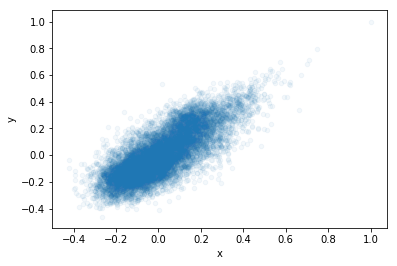

In [279]:
def model_term_similarity(base_model, other_model, word_to_check, common_words):
            
    x_sim = []
    y_sim = []
    
    for common_word in shared:
        if common_word in other_model.wv.vocab:
            abs_sim = base_model.similarity(word_to_check, common_word)
            citance_sim = other_model.similarity(word_to_check, common_word)
            x_sim.append(abs_sim)
            y_sim.append(citance_sim)
        
    df = pd.DataFrame({'x':x_sim, 'y':y_sim, 'word':word_to_check})
    
    return(df)

def get_shared_words(base_model, other_model, topn_words = 10000):
    base_common = base_model.wv.index2entity[:topn_words]
    other_common = other_model.wv.index2entity[:topn_words]

    shared = []
    for word in base_common:
        if word in other_common:
            shared.append(word)

    return(shared)

shared = get_shared_words(intro, methods, topn_words = 100000)
df = model_term_similarity(intro, methods, "propose", shared)
df.plot('x', 'y', kind='scatter', alpha = 0.05)

In [276]:
terms = ["report", "predict", "propose", "might",
         "assume", "may", "seem", "suggest", "cannot", "will", "should", 
         "could", "must", "indicate", "would", "appear"]

shared = get_shared_words(intro, methods, topn_words = 100000)
all_df = pd.concat([model_term_similarity(intro, methods, term, shared) for term in terms])
all_df.to_csv("intro_methods_similarity.txt", sep='\t')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


In [277]:
shared = get_shared_words(intro, discussion, topn_words = 100000)
all_df = pd.concat([model_term_similarity(intro, discussion, term, shared) for term in terms])
all_df.to_csv("intro_discussion_similarity.txt", sep='\t')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


In [278]:
shared = get_shared_words(methods, discussion, topn_words = 100000)
all_df = pd.concat([model_term_similarity(methods, discussion, term, shared) for term in terms])
all_df.to_csv("methods_discussion_similarity.txt", sep='\t')

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
